In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tabulate import tabulate

In [4]:
%run -i ./PHT-RIW-Library.ipynb

# Import images
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)


T_STEP = int(42 / 6) + 1
I_STEP = int(300 / 12) + 1

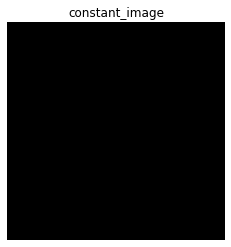

In [5]:
constant_image = np.ones((50, 50)).astype('uint8')
imgshow1(constant_image, 'constant_image')

Progress: [####################] 100.0%


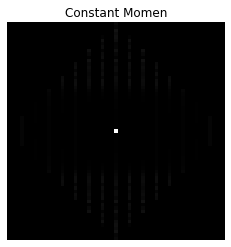

In [7]:
momen = transformPHT(constant_image, 50, 32)
imgshow1(momen, 'Constant Momen')

Progress: [####################] 100.0%


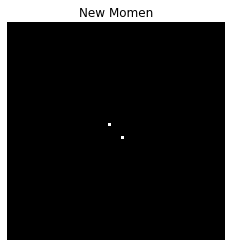

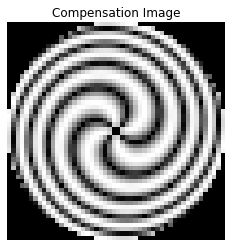

In [8]:
new_momen = np.zeros((65, 65))
new_momen[34,34] = 1
new_momen[30,30] = 1
compensation_image = inversePHT(new_momen, 50, 32)
imgshow1(new_momen, 'New Momen')
imgshow1(compensation_image, 'Compensation Image')

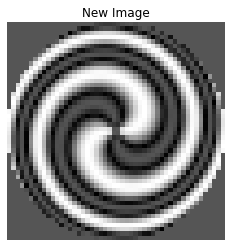

In [9]:
new_image = compensation_image + constant_image
imgshow1(new_image, 'New Image')

Progress: [####################] 100.0%


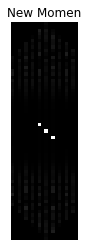

In [14]:
new_momen = transformPHT(new_image, 50, 32)
imgshow1(new_momen[:, 30:34], 'New Momen')

In [16]:
new_momen[:, 30:34]


array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -3.73201225e-02-2.04474082e-04j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  8.66665581e-08-4.63053454e-08j,
        -2.44048466e-02-4.16707216e-03j,  1.32221812e-07-2.09179256e-08j],
       [ 1.02385867e-01-4.90829736e-02j,  1.71900703e-08-1.53227588e-08j,
        -4.84061089e-02-5.30506677e-02j,  1.16298971e-07+8.78410010e-08j],
       [ 6.12421834e-02-5.09077446e-02j,  1.95849094e-07-1.47801952e-08j,
        -3.80242878e-02-3.60764604e-02j,  3.78525264e-08+2.35100313e-07j],
       [-2.02843884e-02+4.76624455e-02j, -3.01671550e-08+6.65419095e-08j,
         6.47529096e-02-1.36770387e-03j, -5.07238020e-08+9.42682852e-08j],
       [-1.47695294e-02-1.44211673e-02j,  4.73857056e-08-2.15321896e-08j,
         4.55180472e-02-2.81867001e-02j, -2.05467263e-07-3.19447609e-08j],
       [ 2.05886212e-02+6.04943443e-02j, -1.84293663e-08+8.98511862e-08j,
         1.89077037e-02+9.968522

In [3]:
def fullAttack(image):
    multipleAttacked = np.copy(image)
    multipleAttacked = attackRotation(multipleAttacked, 10)
    multipleAttacked = attackResize(multipleAttacked, 300)
    multipleAttacked = attackNoiseSaltPepper(multipleAttacked, 0.03)
    multipleAttacked = attackFilterAverage(multipleAttacked, 3)
    multipleAttacked = attackCrop(multipleAttacked, 0.03, 0.03, 0.03, 0.03)
    multipleAttacked = attackJPG(multipleAttacked, 90)
    return multipleAttacked

In [4]:
def process(n, g, p, d):
    p2 = 2 * p + 1
    
    # Preprocess Image
    imgBgr = cv2.resize(ori_img, (n, n)) # Original Image
    imgY = getYFromBGR(imgBgr) #

    # Preprocess Logo
    logo = cv2.resize(ori_logo, (g, g))
    logo = (logo >= 128) * 1
    
    imgWatermarked = watermarkEmbedToImage(imgBgr, logo, n, g, p, d)
    
    mse = np.mean((imgWatermarked - imgBgr) ** 2)
    psnr = 10 * np.log10(255 * 255 / mse)
    
    imgAttacked = fullAttack(imgWatermarked)
    
    (logo2, ber, trf) = watermarkExtractFromImage(imgAttacked, imgWatermarked, logo, n, g, p, d, False)
    
    return (imgBgr, logo, imgWatermarked, logo2, psnr, ber)

Progress: [####################] 100.0%
PSNR = 31.90637807435053
BER = 0.24131944444444445


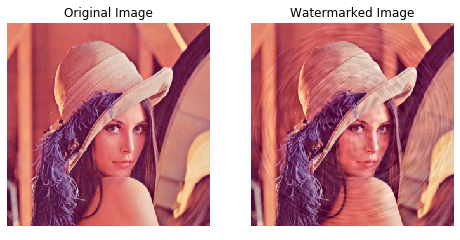

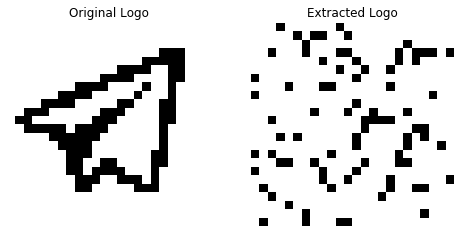

In [5]:
(imgBgr, logo, imgWatermarked, logo2, psnr, ber) = process(320, 24, 36, 0.4)

print('PSNR = {}'.format(psnr))
print('BER = {}'.format(ber))

imgshow([[imgBgr, imgWatermarked]], [['Original Image', 'Watermarked Image']])
imgshow([[logo, logo2]], [['Original Logo', 'Extracted Logo']])


In [7]:
np.arctan2(0, -1)

3.141592653589793

In [138]:
# Steps

N = 320
G = 24
P = 36
D = 0.4

P2 = 2 * P + 1

T_STEP = int(P / 6) + 1
I_STEP = int(N / 12) + 1

%run -i ./PHT-RIW-Library.ipynb

Generating Compensation Image

Progress: [####################] 100.0%


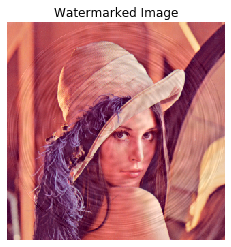

In [140]:
imgWatermarked = watermarkEmbedToImage(IMG_BGR, LOGO, n, g, p, d)
imgshow1(imgWatermarked, 'Watermarked Image')

In [141]:
# Calculate PSNR
MSE = np.mean((imgWatermarked - IMG_BGR) ** 2)
PSNR = 10 * np.log10(255 * 255 / MSE)

print(tabulate([[n, g, p, d, PSNR]], headers=['N', 'G', 'P', 'D', 'PSNR'], tablefmt='orgtbl'))

|   N |   G |   P |   D |    PSNR |
|-----+-----+-----+-----+---------|
| 320 |  24 |  36 | 0.4 | 31.5958 |


In [154]:
# Multiple Attacks

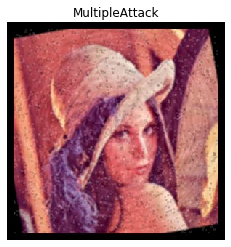

In [155]:


imgshow1(multipleAttacked, 'MultipleAttack')

BER = 17.53%
(0, 0, 1)


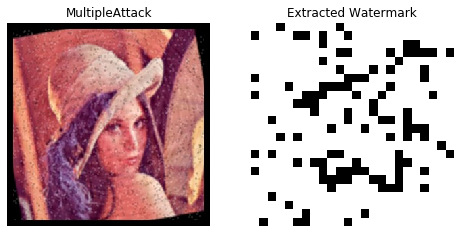

In [156]:
(miLogo, miBer, miTrf) = watermarkExtractFromImage(multipleAttacked, IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, 'MultipleAttack'))

clear_output(wait = True)
print('BER = {:.2%}'.format(miBer))
print(miTrf)
imgshow([[multipleAttacked, miLogo]], [['MultipleAttack', 'Extracted Watermark']])